CSE4022
Natural Language Processing
(Embedded Project)
Fall Semester 2022-23

                                              Topic: Movie Genre prediction using plot summary
                                                                                (Review 3)
                                                                                                       
1) Eshana Mohan      19BCE2216
2) Akanksha Jagdish 19BCE2228
3) Ananya Das           20BCE2696
4) Disha Dutta           20BDS0089
5) Arushi Kapoor       20BDS0171

In [3]:
#used for finding out missing values in the dataset
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
#for visualizing most frequently found words in the different movie genres
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
#used for machine learning algorithms
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [8]:
#used for machine learning algorithms
pip install helper_functions

Note: you may need to restart the kernel to use updated packages.
  Created wheel for helper-functions: filename=helper_functions-2.0.11-py3-none-any.whl size=7527 sha256=7d792b2f791588221ccefc5d0042a08ffee749735854f12ab87b59c084df43d6
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\20\09\86\a8e9b5bdbdf1524bc3e294b549098fb058b3a99fc490bf4275
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=b652a318f760b39a67efea171d17d7b5de589e6c8c3956fdbc540529b197688b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ccd3a97f6c06a49f3f5e9f9d528e6b7efee95bf7a6187fda0009a772e18549f0
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built helper-functions imutils sklearn


In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [14]:
#importing all libraries and packages
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
import re
import os.path
import math
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scipy import sparse
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import nltk
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)
from helper_functions import *
# For reading the data
preprocessed_data = False
if os.path.exists('Data/preprocessed/movies_genres_preprocessed.csv'):
    md = pd.read_csv('Data/preprocessed/movies_genres_preprocessed.csv')
    preprocessed_data = True
else:
    md = pd.read_csv('C:\\Users\\Admin\\Desktop\\BDS2020\\movies_genres.csv', delimiter='\t')
    category_columns = md.columns.drop(['title', 'plot', 'plot_lang'])
for col in category_columns:
    md[col] =md[col].astype('category')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
print('Shape of data: ', md.shape)

Shape of data:  (117194, 30)


In [16]:
md

title  \
0                                    "#7DaysLater" (2013)   
1            "#BlackLove" (2015) {Crash the Party (#1.9)}   
2       "#BlackLove" (2015) {Making Lemonade Out of Le...   
3           "#BlackLove" (2015) {Miss Independent (#1.5)}   
4          "#BlackLove" (2015) {Sealing the Deal (#1.10)}   
...                                                   ...   
117189                    "Ørnen: En krimi-odyssé" (2004)   
117190                         "Øyevitne" (2014) {(#1.1)}   
117191                         "Øyevitne" (2014) {(#1.3)}   
117192                         "Øyevitne" (2014) {(#1.5)}   
117193       "Über Österreich - Juwele des Landes" (2016)   

                                                     plot Action Adult  \
0        #7dayslater is an interactive comedy series f...      0     0   
1        With just one week left in the workshops, the...      0     0   
2        All of the women start making strides towards...      0     0   
3        All five of these women are independent and s...      0     0   
4        Despite having gone through a life changing p...      0     0   
...                                                   ...    ...   ...   
117189   Ørnen, an Icelandic inspector in the Danish p...      0     0   
117190   Two young kids, Henning and Philip are attrac...      0     0   
117191   Someone tries to kill a motorcycle gang membe...      0     0   
117192   Helen sees her investigation forward signific...      0     0   
117193   Georg Riha is and will remain the master of a...      0     0   

       Adventure Animation Biography Comedy Crime Documentary  ... Reality-TV  \
0              0         0         0      1     0           0  ...          0   
1              0         0         0      0     0           0  ...          1   
2              0         0         0      0     0           0  ...          1   
3              0         0         0      0     0           0  ...          1   
4              0         0         0      0     0           0  ...          1   
...          ...       ...       ...    ...   ...         ...  ...        ...   
117189         0         0         0      0     1           0  ...          0   
117190         0         0         0      0     1           0  ...          0   
117191         0         0         0      0     1           0  ...          0   
117192         0         0         0      0     1           0  ...          0   
117193         0         0         0      0     0           1  ...          0   

       Romance Sci-Fi Short Sport Talk-Show Thriller War Western plot_lang  
0            0      0     0     0         0        0   0       0        en  
1            0      0     0     0         0        0   0       0        en  
2            0      0     0     0         0        0   0       0        en  
3            0      0     0     0         0        0   0       0        en  
4            0      0     0     0         0        0   0       0        en  
...        ...    ...   ...   ...       ...      ...  ..     ...       ...  
117189       0      0     0     0         0        0   0       0        en  
117190       0      0     0     0         0        0   0       0        en  
117191       0      0     0     0         0        0   0       0        en  
117192       0      0     0     0         0        0   0       0        en  
117193       0      0     0     0         0        0   0       0        en  

[117194 rows x 30 columns]

In [17]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117194 entries, 0 to 117193
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   title        117194 non-null  object  
 1   plot         117194 non-null  object  
 2   Action       117194 non-null  category
 3   Adult        117194 non-null  category
 4   Adventure    117194 non-null  category
 5   Animation    117194 non-null  category
 6   Biography    117194 non-null  category
 7   Comedy       117194 non-null  category
 8   Crime        117194 non-null  category
 9   Documentary  117194 non-null  category
 10  Drama        117194 non-null  category
 11  Family       117194 non-null  category
 12  Fantasy      117194 non-null  category
 13  Game-Show    117194 non-null  category
 14  History      117194 non-null  category
 15  Horror       117194 non-null  category
 16  Music        117194 non-null  category
 17  Musical      117194 non-null  category
 18  Myst

<AxesSubplot:>

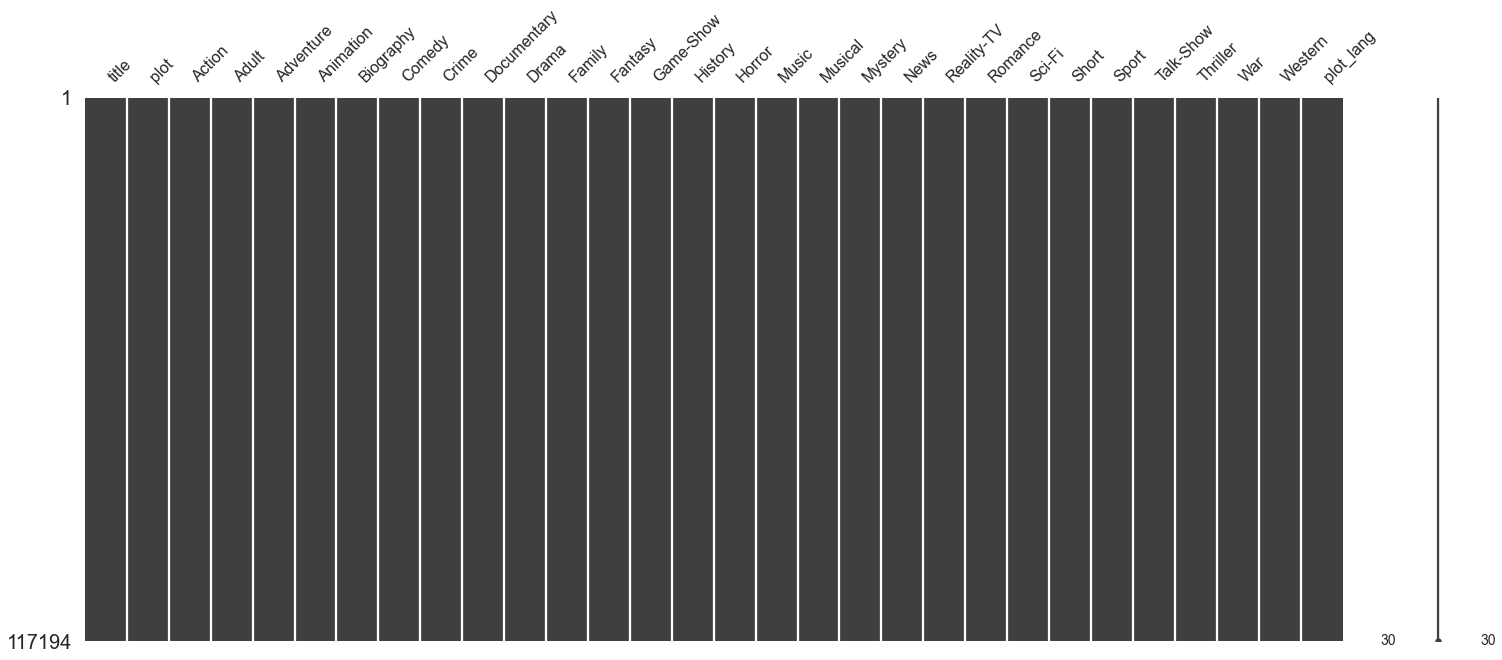

In [18]:
#checks missing values
msno.matrix(md)

In [19]:
#converts all the genre feature set into categorical types
catcol = md.columns.drop(['title', 'plot', 'plot_lang'])
for i in catcol:
    md[i] = md[i].astype('category')
catcol   

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

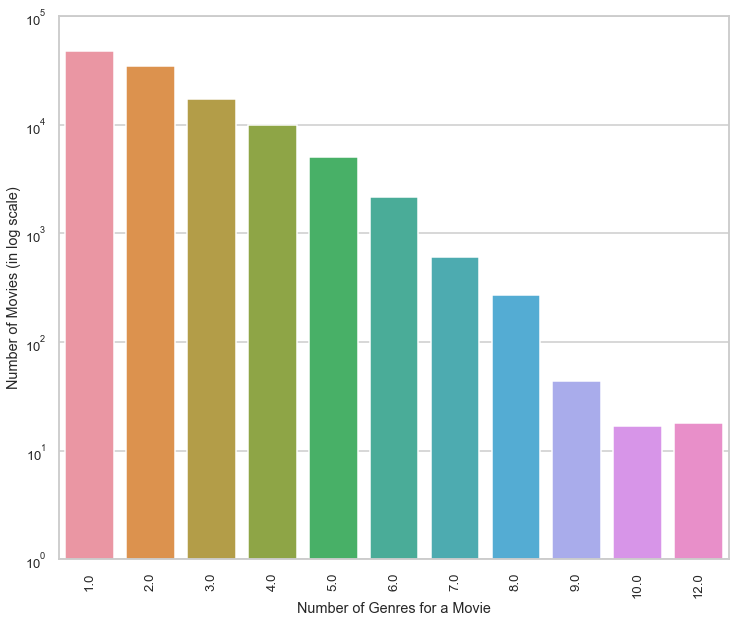

In [20]:
sm = md[catcol].sum(axis=1)
df_genres_per_movie = pd.DataFrame({'title': mydata.title, 'num_genres':sum_movie}).groupby('num_genres').count()
f, ax = plt.subplots(1, 1, figsize=(12, 10))
#for plotting the bar graph
sns.barplot(data=df_genres_per_movie, x=df_genres_per_movie.index, y='title', axes=ax)
ax.set(yscale='log', ylim=(1, 1e5), xlabel='Number of Genres for a Movie', ylabel='Number of Movies (in log scale)')
plt.xticks(rotation=90)
#displaying the bar graph
plt.show()

In [21]:
#DATA PREPROCESSING
def rp(sentence):
    cleaned_sentence = re.sub(r'[?|!|\'|"|#]', '', sentence)
    cleaned_sentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', cleaned_sentence)
    cleaned_sentence = cleaned_sentence.replace("\n"," ")
    return cleaned_sentence
def rm(sentence):
    html_tag = '<.*?>'
    cleaned_sentence = re.sub(html_tag, ' ',  sentence)
    return cleaned_sentence
def lc(sentence):
    lower_case_sentence = sentence.lower()
    return lower_case_sentence
def ra(sentence):
    cleaned_sentence = unicodedata.normalize('NFD', sentence)
    cleaned_sentence = cleaned_sentence.encode('ascii', 'ignore')
    cleaned_sentence = cleaned_sentence.decode("utf-8")
    return cleaned_sentence
#DATA PREPROCESSING
def rp(sentence):
    cleaned_sentence = re.sub(r'[?|!|\'|"|#]', '', sentence)
    cleaned_sentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', cleaned_sentence)
    cleaned_sentence = cleaned_sentence.replace("\n"," ")
    return cleaned_sentence
def rm(sentence):
    html_tag = '<.*?>'
    cleaned_sentence = re.sub(html_tag, ' ',  sentence)
    return cleaned_sentence
def lc(sentence):
    lower_case_sentence = sentence.lower()
    return lower_case_sentence
def ra(sentence):
    cleaned_sentence = unicodedata.normalize('NFD', sentence)
    cleaned_sentence = cleaned_sentence.encode('ascii', 'ignore')
    cleaned_sentence = cleaned_sentence.decode("utf-8")
    return cleaned_sentence
def ka(sentence):
    alpha_sentence = re.sub('[^a-z A-Z]+', ' ', sentence)
    return alpha_sentence
def stg(sentence):
    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in sentence.split()]
    stemmed_sentence=' '.join(stemmed_words)
    return stemmed_sentence
def  lws(sentence):
    lem = WordNetLemmatizer()
    lemmatized_words = [lem.lemmatize(word, 'v') for word in sentence.split()]
    lemmatized_sentence=' '.join(lemmatized_words)
    return lemmatized_sentence
def ka(sentence):
    alpha_sentence = re.sub('[^a-z A-Z]+', ' ', sentence)
    return alpha_sentence
def stg(sentence):
    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in sentence.split()]
    stemmed_sentence=' '.join(stemmed_words)
    return stemmed_sentence


In [22]:
def rsw(stc):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten',
                       'may','also','across','among','beside','however','yet','within'])
    no_stop_words=[word for word in stc.split() if word not in stop_words]
    no_step_stc = ' '.join(no_stop_words)
    return no_step_stc
def tp(stc):
    pr_prc_stc = rt(stc)
    pr_prc_stc =ra(pr_prc_stc)
    pr_prc_stc = rp(pr_prc_stc)
    pr_prc_stc = ka(pr_prc_stc)
    pr_prc_stc = lc(pr_prc_stc)
    pr_prc_stc = llws(pr_prc_stc)
    pr_prc_stc =rsw(pr_prc_stc)
    return pr_prc_stc


In [23]:
md.plot_lang.describe()

count     117194
unique         1
top           en
freq      117194
Name: plot_lang, dtype: object

In [24]:
mydata = mydata.drop('plot_lang', axis=1)

<Figure size 1008x1440 with 0 Axes>

<Figure size 1008x1440 with 0 Axes>

<Figure size 1008x1440 with 0 Axes>

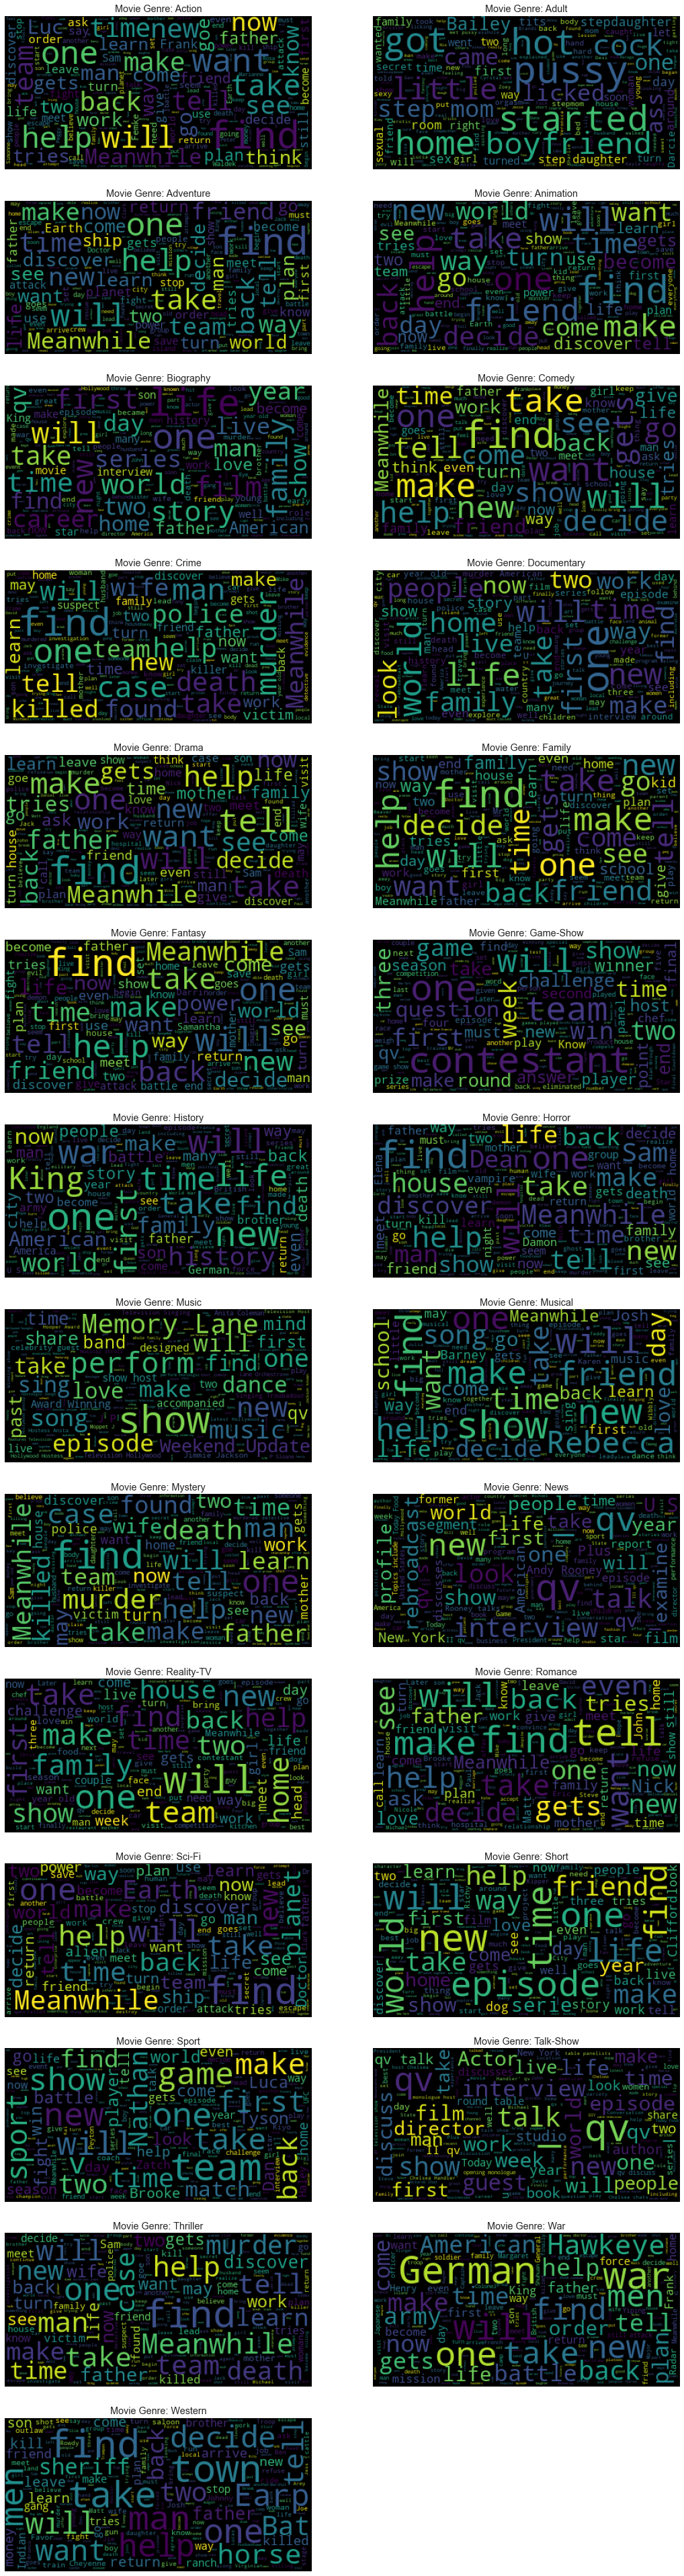

In [39]:
def save_wordcloud_plots(data, labels):
    for idx, col in enumerate(labels):
        wordcloud = WordCloud(max_font_size=50).generate(' '.join(data[data[col]==1]['plot']))
        ax = plt.figure(figsize=(9, 9)).add_subplot(1, 1, 1)
        ax.imshow(wordcloud)
        ax.axis("off")
        ax.set(title='Movie Genre: {0}'.format(col))
        plt.savefig('C:\\Users\\Admin\\Desktop\\BDS2020\\wordcloud_{0}.png'.format(col), bbox_inches='tight')
        plt.close()
#creating wordclouds and importing them in this notebook        
def save_wordcloud_subplots(data, labels):
    num_plot = 3
    fig_per_plot = 10 
    num_cols = 2
    num_rows = math.ceil(fig_per_plot/num_cols)
    for idx, col in enumerate(category_columns):
        if idx%fig_per_plot==0:
            fig = plt.figure(figsize=(14, 20))
        wordcloud = WordCloud(max_font_size=50).generate(' '.join(mydata[mydata[col]==1]['plot']))
        ax = fig.add_subplot(num_rows, num_cols, idx%fig_per_plot+1)
        ax.imshow(wordcloud)
        ax.axis("off")
        ax.set(title='Movie Genre: {0}'.format(col))
        if (idx+1)%fig_per_plot==0 or idx==len(category_columns)-1:
            plt.savefig('C:\\Users\\Admin\\Desktop\\BDS2020\\wordcloud_part{0}.png'.format(1+idx//fig_per_plot), bbox_inches='tight')
            plt.close()
            fig = plt.figure(figsize=(14, 20))
if not os.path.exists('C:\\Users\\Admin\\Desktop\\BDS2020\\wordcloud_Action.png'):
    save_wordcloud_plots(mydata, category_columns)
if not os.path.exists('C:\\Users\\Admin\\Desktop\\BDS2020\\wordcloud_part1.png'):
    save_wordcloud_subplots(mydata, category_columns)
fig = plt.figure(figsize=(18, 70))
num_cols = 2
num_rows = math.ceil(len(category_columns)/num_cols)
for idx, col in enumerate(category_columns):
    wordcloud = WordCloud(max_font_size=50).generate(' '.join(mydata[mydata[col]==1]['plot']))
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set(title='Movie Genre: {0}'.format(col))
plt.show()           

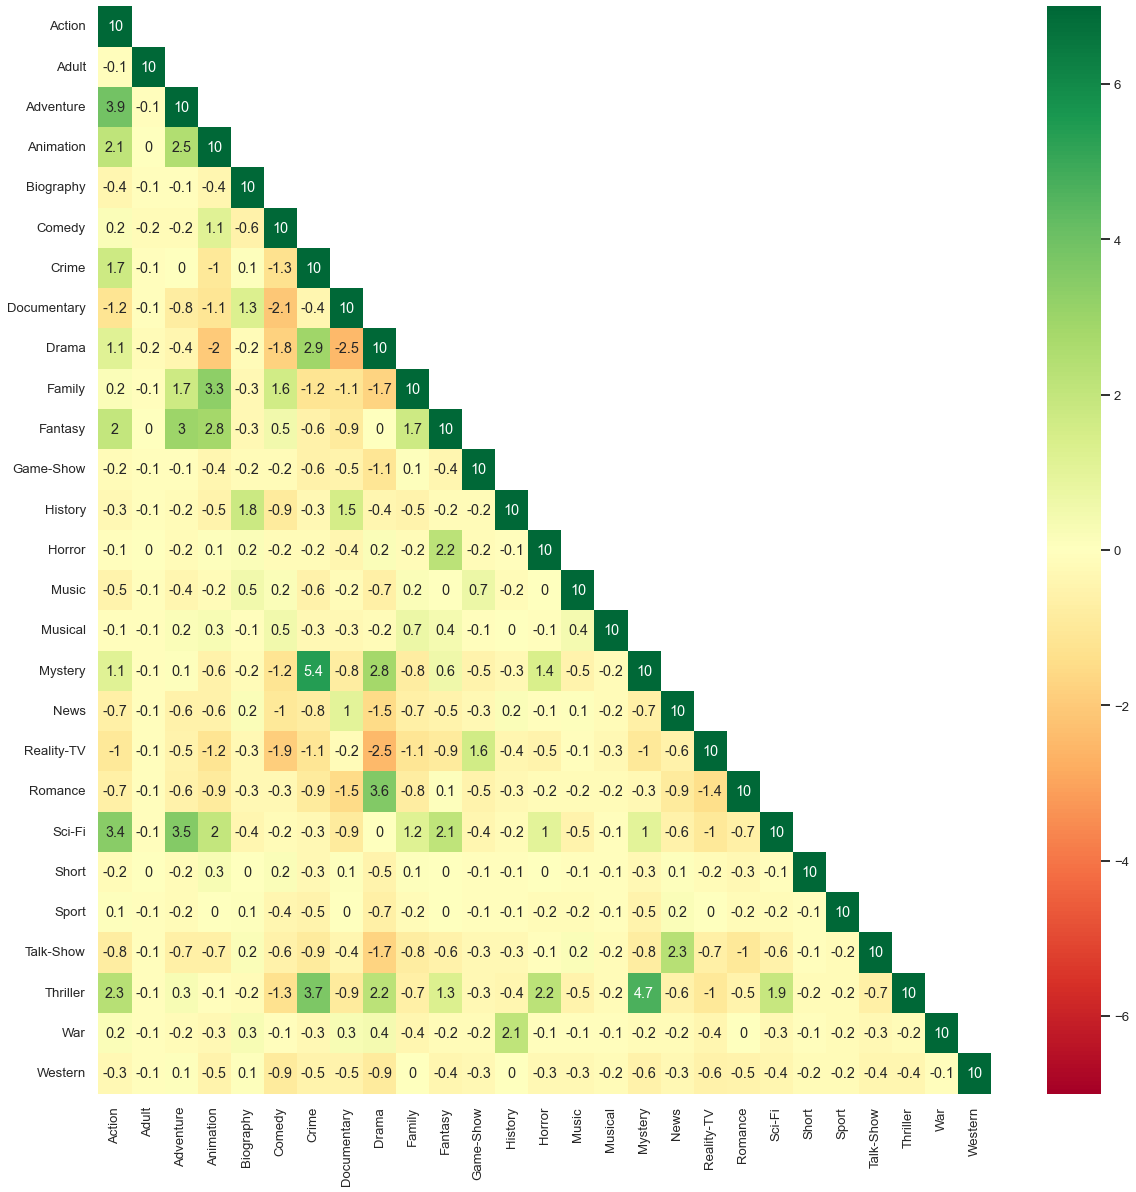

In [40]:
#check correlation of genres with each other 
corr_matrix = (mydata[category_columns].astype('int')).corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
corr_matrix = (100*corr_matrix//1)/10
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=7, vmin=-7, cmap='RdYlGn')
plt.show()

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

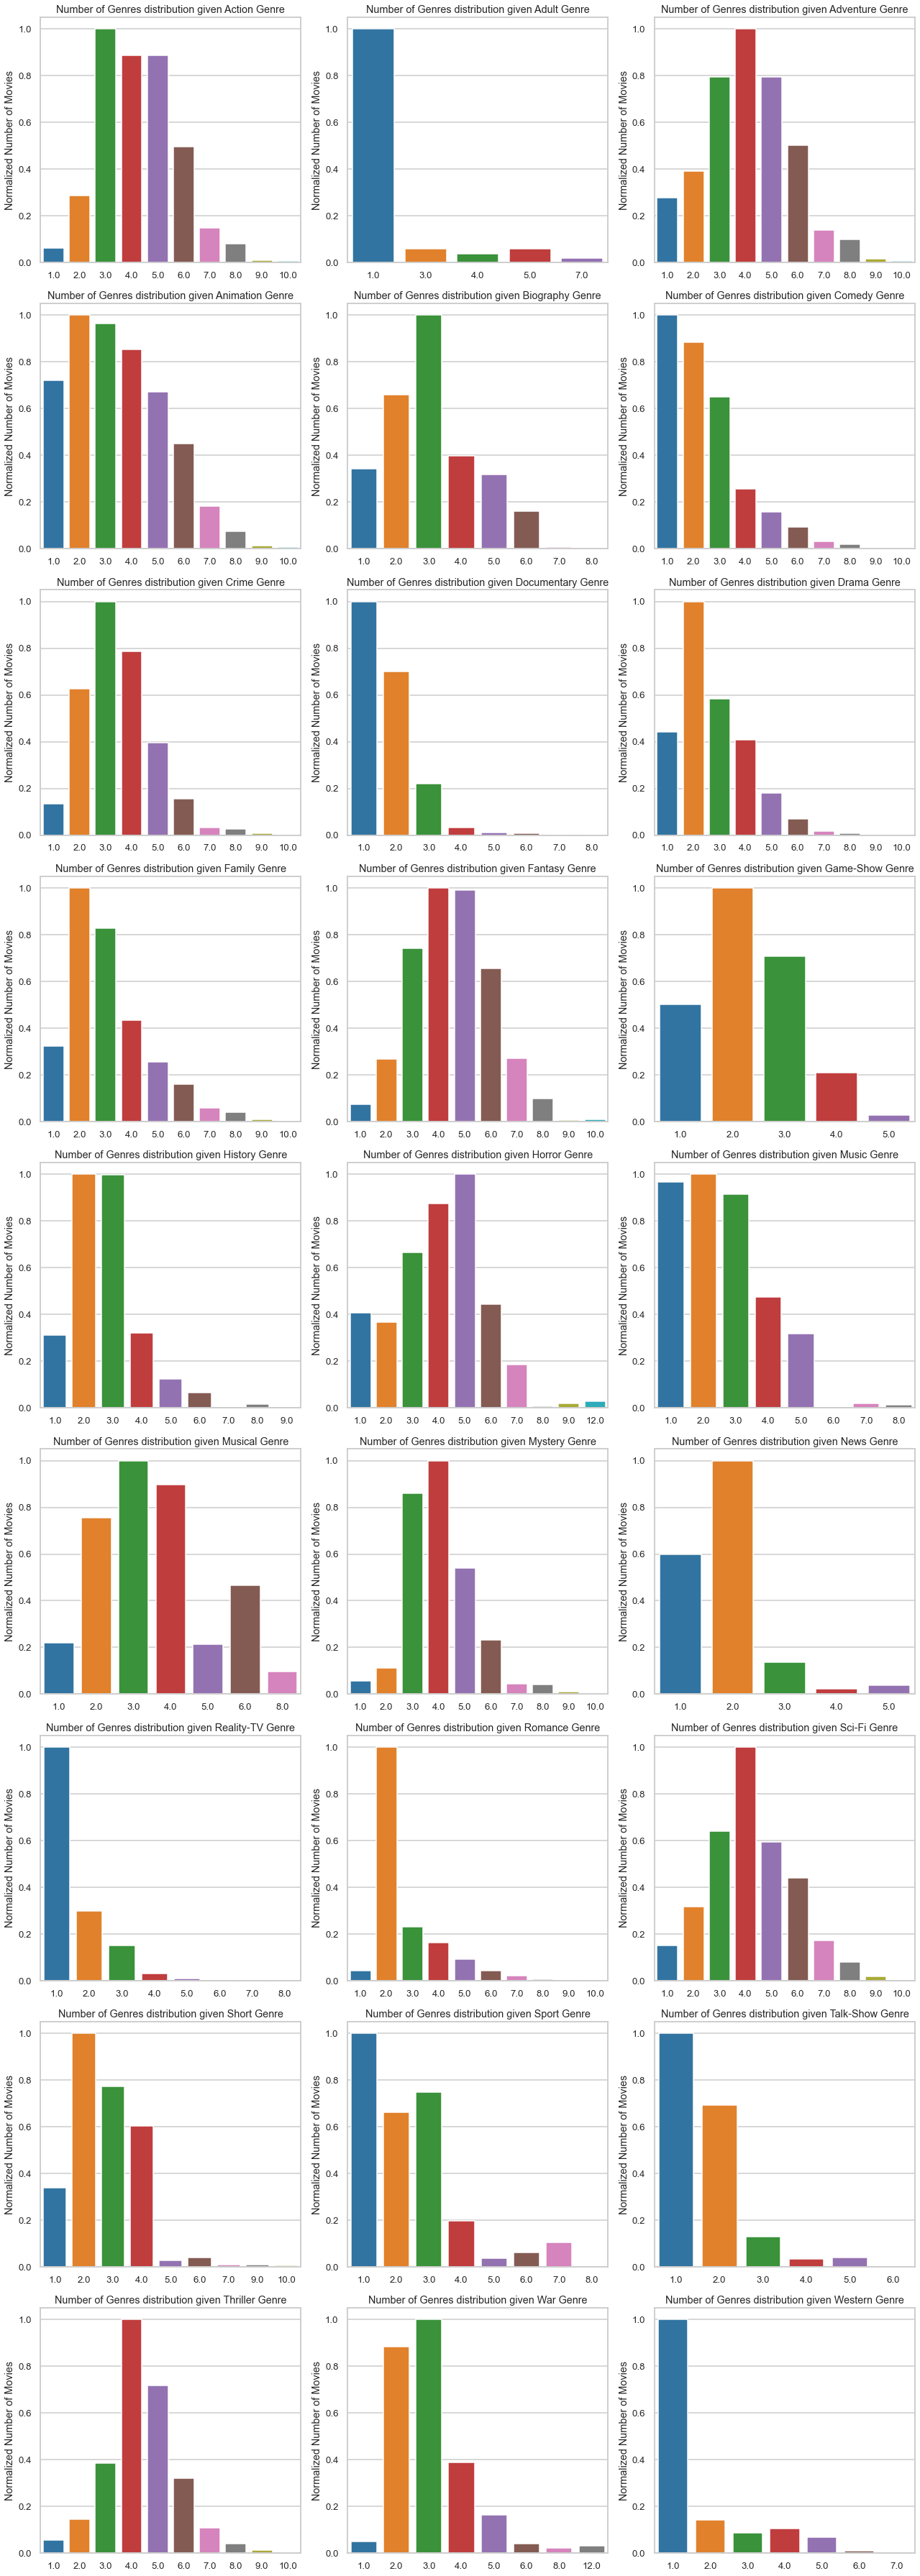

In [42]:
def save_numGenre_pdf_given_genre_plots(data, labels):
    for idx, col in enumerate(labels):
        df_genres_per_movie = pd.DataFrame({'Total': data[data[col]==1][labels].sum(axis=1)})
        df_numG_given_genre = pd.DataFrame(df_genres_per_movie['Total'].value_counts().sort_index().head(10))
        df_numG_given_genre['Total'] = df_numG_given_genre['Total']/df_numG_given_genre['Total'].max()
        ax = plt.figure(figsize=(9, 9)).add_subplot(1, 1, 1)
        sns.barplot(data=df_numG_given_genre, x=df_numG_given_genre.index, y='Total', axes=ax)
        ax.set(title='Number of Genres distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
        plt.savefig('C:\\Users\\Admin\\Desktop\\BDS2020\\numGenre_pdf_given_{0}.png'.format(col), bbox_inches='tight')
        plt.close()     
def save_numGenre_pdf_given_genre_subplots(data, labels):
    num_plot = 3
    fig_per_plot = math.ceil(len(category_columns)/num_plot)
    num_cols = 3
    num_rows = math.ceil(fig_per_plot/num_cols)
    for idx, col in enumerate(category_columns):
        if idx%fig_per_plot==0:
            fig = plt.figure(figsize=(20, 30))
        df_genres_per_movie = pd.DataFrame({'Total': data[data[col]==1][labels].sum(axis=1)})
        df_numG_given_genre = pd.DataFrame(df_genres_per_movie['Total'].value_counts().sort_index().head(10))
        df_numG_given_genre['Total'] = df_numG_given_genre['Total']/df_numG_given_genre['Total'].max()
        ax = fig.add_subplot(num_rows, num_cols, idx%fig_per_plot+1)
        sns.barplot(data=df_numG_given_genre, x=df_numG_given_genre.index, y='Total', axes=ax)
        ax.set(title='Number of Genres distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
        if (idx+1)%fig_per_plot==0 or idx==len(category_columns)-1:
            plt.savefig('C:\\Users\\Admin\\Desktop\\BDS2020\\numGenre_pdf_part{0}.png'.format(1+idx//fig_per_plot), bbox_inches='tight')
            plt.close()
            fig = plt.figure(figsize=(20, 30))
if not os.path.exists('C:\\Users\\Admin\\Desktop\\BDS2020\\numGenre_pdf_given_Action.png'):
    save_numGenre_pdf_given_genre_plots(mydata, category_columns)
if not os.path.exists('C:\\Users\\Admin\\Desktop\\BDS2020\\numGenre_pdf_part1.png'):
    save_numGenre_pdf_given_genre_subplots(mydata, category_columns)
fig = plt.figure(figsize=(18, 50))
num_cols = 3
num_rows = math.ceil(len(category_columns)/num_cols)
for idx, col in enumerate(category_columns):
    df_genres_per_movie = pd.DataFrame({'Total': mydata[mydata[col]==1][category_columns].sum(axis=1)})
    df_numG_given_genre = pd.DataFrame(df_genres_per_movie['Total'].value_counts().sort_index().head(10))
    df_numG_given_genre['Total'] = df_numG_given_genre['Total']/df_numG_given_genre['Total'].max()
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    sns.barplot(data=df_numG_given_genre, x=df_numG_given_genre.index, y='Total', axes=ax)
    ax.set(title='Number of Genres distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
plt.tight_layout()
plt.show()

In [25]:
#Model for genre tagging
def multi_label_train_test_split(data, labels, min_test_size=0.15, shuffle=True, random_state=29):
    data_size = data.shape[0]
    data_test_idx = np.array([False]*data_size)
    n_folds = math.floor(1/min_test_size)
    data_train, data_test = pd.DataFrame(), pd.DataFrame()
    for col in labels:
        data_curr_genre = data[data[col]==1]   
        curr_genre_size = data_curr_genre.shape[0]
        curr_test_size = math.ceil(curr_genre_size*min_test_size)    
        curr_genre_test_idx = np.array([False]*curr_genre_size)
        kf = KFold(curr_genre_size, n_folds=n_folds, shuffle=shuffle, random_state=random_state)
        curr_genre_test_idx[kf.idxs[0:curr_test_size]]=True
        data_test_idx[data_curr_genre[curr_genre_test_idx].index]=True
    data_test = data[data_test_idx]
    data_train = data[~data_test_idx]
    return data_train, data_test

In [26]:
md_train = pd.read_csv('C:\\Users\\Admin\\Desktop\\BDS2020\\movies_genres_train_preprocessed.csv')
md_test = pd.read_csv('C:\\Users\\Admin\\Desktop\\BDS2020\\movies_genres_test_preprocessed.csv')

In [27]:
#checking out ratio between training and test data
print('Fraction of data in the Training Data Set: {0:.3f}'.format(mydata_test.shape[0]/mydata.shape[0]))

Fraction of data in the Training Data Set: 0.195


In [49]:
#scores extracted after performing training data on various ml algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Overall Precision'] = None
algo_score['Overall Recall'] = None
algo_score['Overall F1-Score'] = None
algo_score.loc['BR+CV+SVC'] = [0.86, 0.63, 0.72]
algo_score.loc['BR+TF-IDF+SVC'] = [0.85, 0.72, 0.77]
algo_score.loc['BR+TF-IDF+LR'] = [0.7, 0.79, 0.74]
algo_score.loc['BR+TF-IDF+NB'] = [0.8, 0.73, 0.76]
algo_score.loc['LP+CV+SVC'] = [0.81, 0.76, 0.79]
algo_score.loc['LP+TF-IDF+NB'] = [0.87, 0.54, 0.64]
algo_score.loc['LP+TF-IDF+SVC'] = [0.85, 0.82, 0.83]
algo_score.loc['LPC+TF-IDF+SVC'] = [0.86, 0.61, 0.7]
algo_score.loc['LP+Embed+Cosine'] = [0.57, 0.65, 0.6]
algo_score.loc['LP+Embed+NN'] = [0.77, 0.54, 0.62]
algo_score.loc['BR+Embed+NN'] = [0.64, 0.47, 0.47]
algo_score

Overall Precision  Overall Recall  Overall F1-Score
Modelling Algo                                                      
BR+CV+SVC                     0.86            0.63              0.72
BR+TF-IDF+SVC                 0.85            0.72              0.77
BR+TF-IDF+LR                  0.70            0.79              0.74
BR+TF-IDF+NB                  0.80            0.73              0.76
LP+CV+SVC                     0.81            0.76              0.79
LP+TF-IDF+NB                  0.87            0.54              0.64
LP+TF-IDF+SVC                 0.85            0.82              0.83
LPC+TF-IDF+SVC                0.86            0.61              0.70
LP+Embed+Cosine               0.57            0.65              0.60
LP+Embed+NN                   0.77            0.54              0.62
BR+Embed+NN                   0.64            0.47              0.47

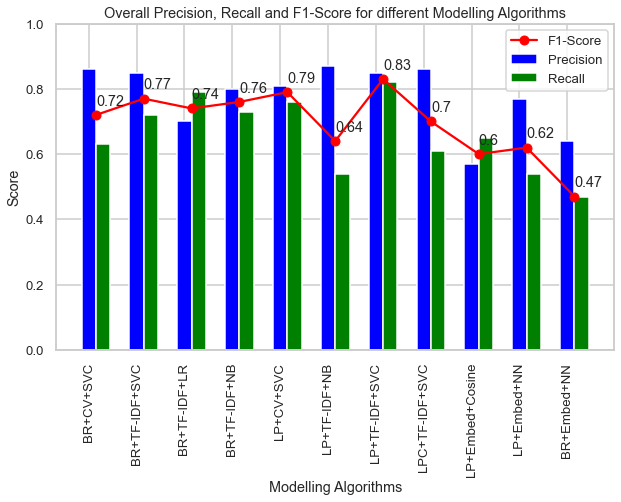

In [50]:
#plotting the comparison
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
#precision,recall and accuracy shown here
plt.bar(data=algo_score, height='Overall Precision', x=idx, color='b', width=bar_width, label='Precision')
plt.bar(data=algo_score, height='Overall Recall', x=idx+bar_width, color='g', width=bar_width, label='Recall')
plt.plot(idx+0.15, algo_score['Overall F1-Score'], marker='o', color='r', label='F1-Score')
for i, j in zip(idx, algo_score['Overall F1-Score']): 
    axes.annotate(str(j), xy = (i+0.15, j+0.03))
    #labelling shown here
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('Score')
plt.ylim((0, 1))
plt.title('Overall Precision, Recall and F1-Score for different Modelling Algorithms')
plt.legend()
plt.show()